In [276]:
from cmdstanpy import cmdstan_path, CmdStanModel, __version__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

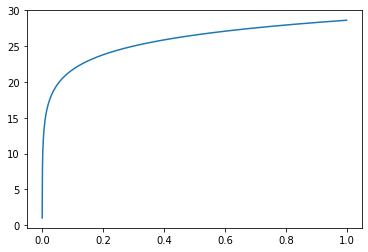

In [267]:
x = np.arange(1000)/1000
y = 1 + 3*np.log(1+10000*x)
plt.plot(x,y)

In [268]:
print(__version__)

0.9.68


In [269]:
ms = CmdStanModel(stan_file="../stan/ovarian_estimulation/sample.stan")

INFO:cmdstanpy:compiling stan program, exe file: /home/cerquide/prj/continuous_causal_treament/src/stan/m0/sample
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /home/cerquide/prj/continuous_causal_treament/src/stan/m0/sample


In [270]:
print(ms.code())

data {
  int<lower=1> n; //number of patients
  
  real treatment_concentration; // The larger, the more sharply peaked the treatment is
  real average_quality; // The average quality of the estimulated patient
  real quality_concentration; // The larger, the more concentrated patients are around its average quality
  
}

parameters {
}

generated quantities {
  real x[n];
  real t[n];
  real y[n];
  real quality_alpha = ((quality_concentration-2)*average_quality+1)/(1-average_quality);
  for (i in 1:n) {
    x[i] = beta_rng(quality_alpha, quality_concentration);
    real average_treatment = 1-x[i]; // Highest quality patients receive less treatment
    
    real treatment_alpha = ((treatment_concentration-2)*average_treatment+1)/(1-average_treatment);
    // print("alpha",alpha);
    t[i] = beta_rng(treatment_alpha, treatment_concentration);
    y[i] = -1;
    real max_oocytes = 1 + 3*log( 1 + 10000*t[i]);
    while (y[i] < 0) {
      real mu = max_oocytes*x[i];
      //y[i] = normal_

In [271]:

beta = 2


In [272]:
concentrations=[1.1, 2, 5, 10, 100]

In [273]:
def corr_plot(x, y, x_name="x", y_name="y"):
    print("Distribution of "+y_name+" by "+x_name)
    model = LinearRegression()
    x.shape=(len(x),1)
    y.shape=(len(y),1)
    m = model.fit(x,y)
    #print(m.coef_, m.intercept_)
    xs = np.array([np.min(x), np.max(x)])
    xs.shape=(2,1)
    ys = m.predict(xs)
    #print(ys)
    plt.plot(xs.flatten(),ys.flatten())
    plt.hist2d(x.flatten(), y.flatten(), bins = (20,20), cmap=plt.cm.jet)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    plt.plot(xs, ys)
    a = plt.plot(x, y, 'o', alpha=0.005)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

def plot_by_concentrations(concentrations):
    n = 100000
    for treatment_concentration in concentrations:
        print("Treatment concentration", treatment_concentration)
        data = {"n" : n, 
                "average_quality": 0.2,
                "quality_concentration": 5,
                "treatment_concentration" : treatment_concentration,
                }
        s = ms.sample(data=data, fixed_param=True, iter_sampling=1)
        x = s.stan_variable("x").flatten()
        t = s.stan_variable("t").flatten()
        y = s.stan_variable("y").flatten()
        #print("Distribution of patient quality")
        sns.distplot(x)
        plt.show()
        
        corr_plot(x,t, "Quality", "Treatment")
        corr_plot(t,y, "Treatment", "Oocytes")
        corr_plot(x,y, "Quality", "Oocytes")
        

INFO:cmdstanpy:start chain 1


Treatment concentration 1.1


INFO:cmdstanpy:finish chain 1


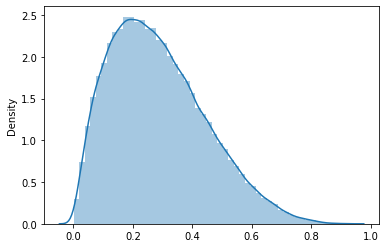

Distribution of Treatment by Quality


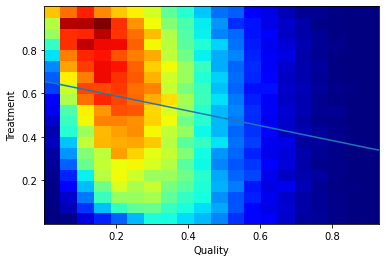

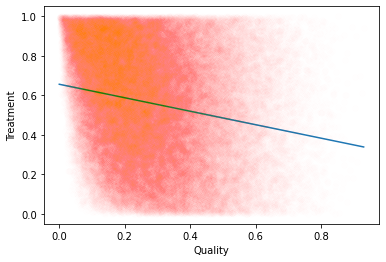

Distribution of Oocytes by Treatment


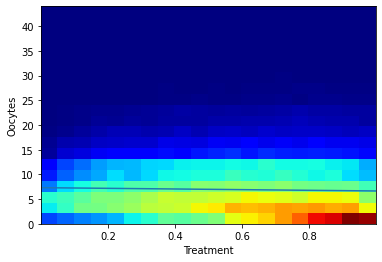

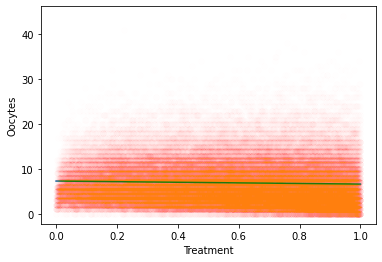

Distribution of Oocytes by Quality


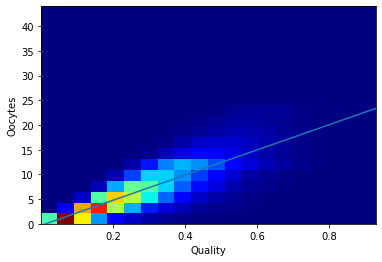

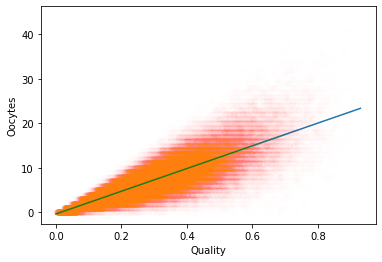

INFO:cmdstanpy:start chain 1


Treatment concentration 2


INFO:cmdstanpy:finish chain 1


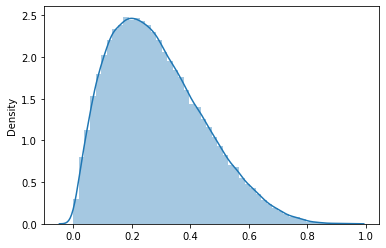

Distribution of Treatment by Quality


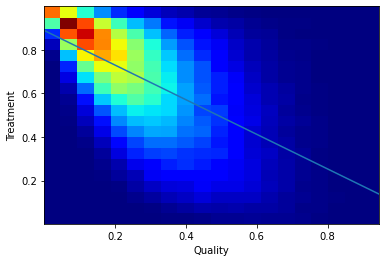

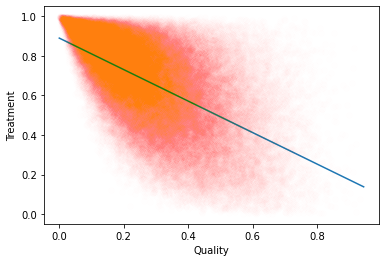

Distribution of Oocytes by Treatment


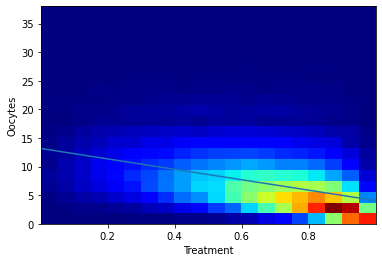

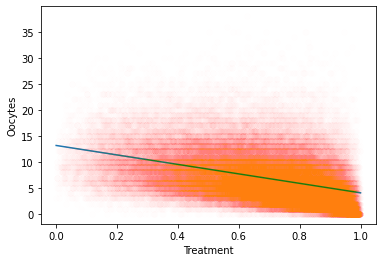

Distribution of Oocytes by Quality


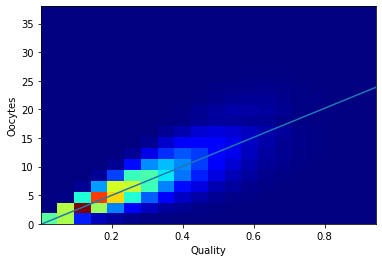

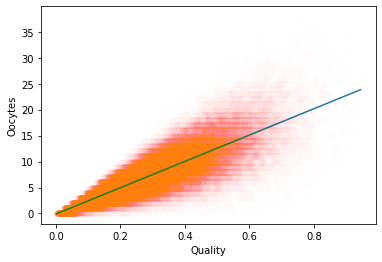

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Treatment concentration 5


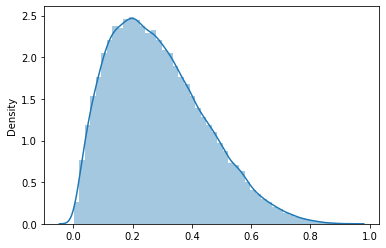

Distribution of Treatment by Quality


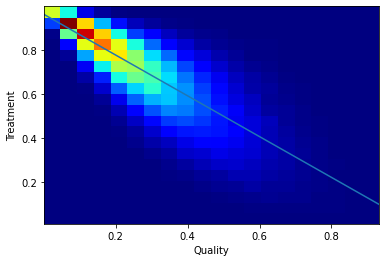

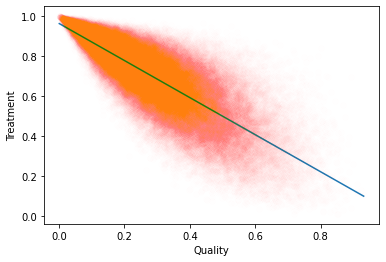

Distribution of Oocytes by Treatment


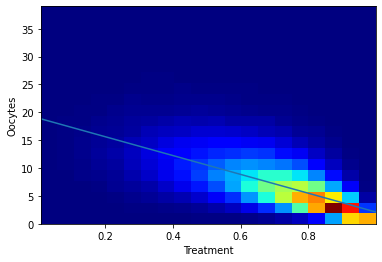

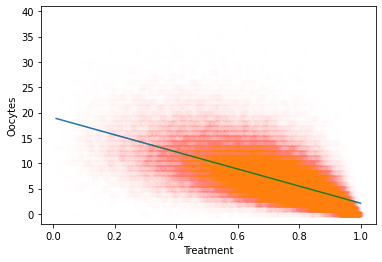

Distribution of Oocytes by Quality


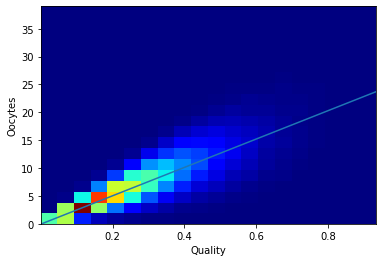

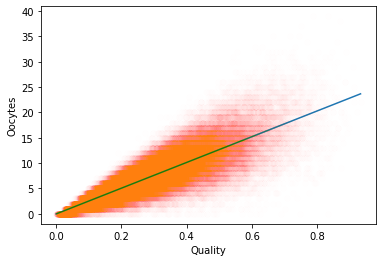

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Treatment concentration 10


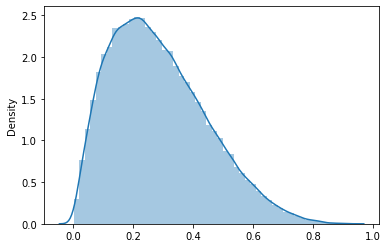

Distribution of Treatment by Quality


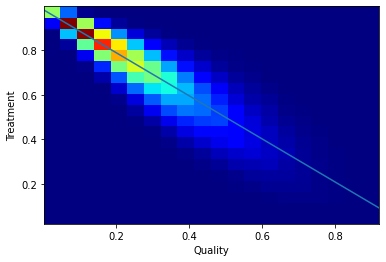

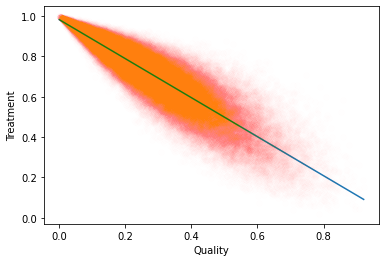

Distribution of Oocytes by Treatment


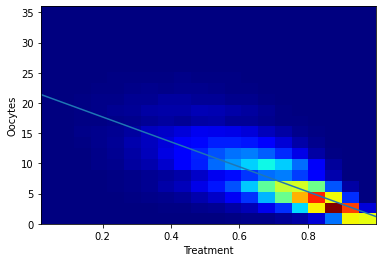

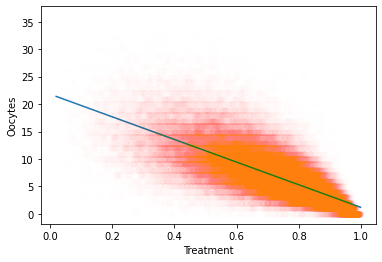

Distribution of Oocytes by Quality


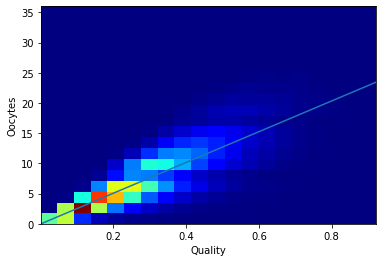

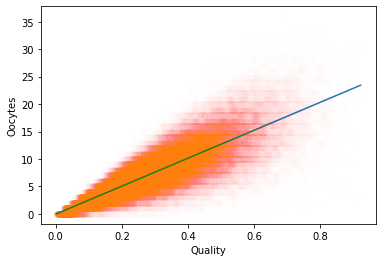

INFO:cmdstanpy:start chain 1


Treatment concentration 100


INFO:cmdstanpy:finish chain 1


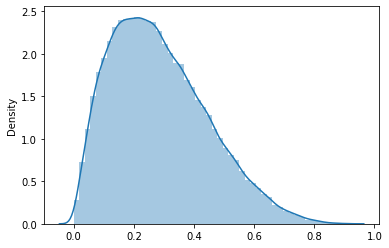

Distribution of Treatment by Quality


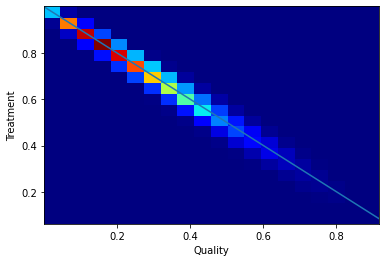

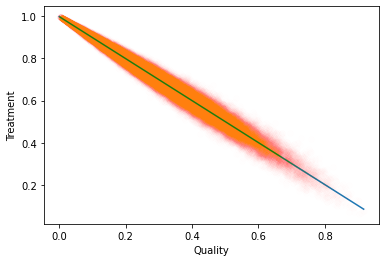

Distribution of Oocytes by Treatment


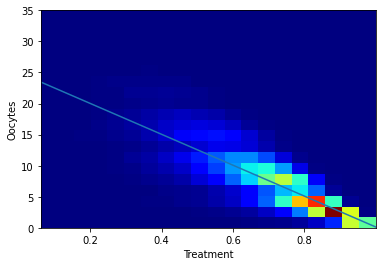

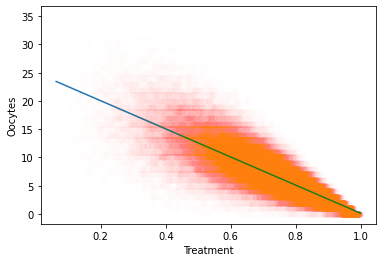

Distribution of Oocytes by Quality


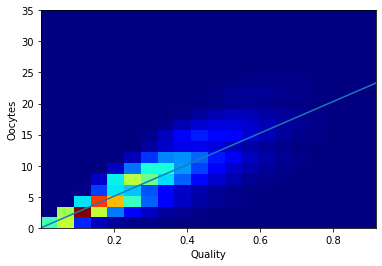

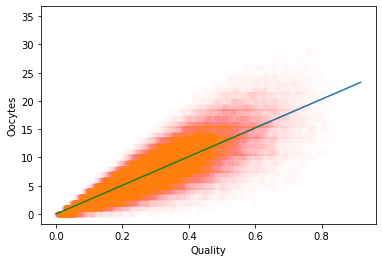

In [274]:
plot_by_concentrations(concentrations)